In [1]:
import pandas as pd

file = "nifty_500.csv"
df = pd.read_csv(file)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [3]:
df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [7]:
df[cols_to_convert] = df[cols_to_convert].replace("-", pd.NA)
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df.drop(columns=["Company Name", "Symbol"], inplace=True)
df = pd.get_dummies(df, columns=["Industry", "Series"], drop_first=True)
#missing values
missing_values = df.isnull().sum()
df.info(), missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Open                                        501 non-null    float64
 1   High                                        501 non-null    float64
 2   Low                                         501 non-null    float64
 3   Previous Close                              501 non-null    float64
 4   Last Traded Price                           501 non-null    float64
 5   Change                                      496 non-null    float64
 6   Percentage Change                           498 non-null    float64
 7   Share Volume                                501 non-null    int64  
 8   Value (Indian Rupee)                        501 non-null    float64
 9   52 Week High                                501 non-null    float64
 10  52 Week Low   

(None,
 Open                                           0
 High                                           0
 Low                                            0
 Previous Close                                 0
 Last Traded Price                              0
 Change                                         5
 Percentage Change                              3
 Share Volume                                   0
 Value (Indian Rupee)                           0
 52 Week High                                   0
 52 Week Low                                    0
 365 Day Percentage Change                     44
 30 Day Percentage Change                       3
 Industry_Capital Goods                         0
 Industry_Chemicals                             0
 Industry_Construction                          0
 Industry_Construction Materials                0
 Industry_Consumer Durables                     0
 Industry_Consumer Services                     0
 Industry_Diversified                      

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Previous Close', 'Last Traded Price', 'Change',
       'Percentage Change', 'Share Volume', 'Value (Indian Rupee)',
       '52 Week High', '52 Week Low', '365 Day Percentage Change',
       '30 Day Percentage Change', 'Industry_Capital Goods',
       'Industry_Chemicals', 'Industry_Construction',
       'Industry_Construction Materials', 'Industry_Consumer Durables',
       'Industry_Consumer Services', 'Industry_Diversified',
       'Industry_Fast Moving Consumer Goods', 'Industry_Financial Services',
       'Industry_Forest Materials', 'Industry_Healthcare',
       'Industry_Information Technology',
       'Industry_Media Entertainment & Publication',
       'Industry_Metals & Mining', 'Industry_Oil Gas & Consumable Fuels',
       'Industry_Power', 'Industry_Realty', 'Industry_Services',
       'Industry_Telecommunication', 'Industry_Textiles', 'Series_EQ'],
      dtype='object')

In [11]:
df["Change"].fillna(df["Change"].median(), inplace=True)
df["Percentage Change"].fillna(df["Percentage Change"].median(), inplace=True)

df["365 Day Percentage Change"].fillna(df["365 Day Percentage Change"].mean(), inplace=True)
df["30 Day Percentage Change"].fillna(df["30 Day Percentage Change"].mean(), inplace=True)

missing_values_after = df.isnull().sum()
missing_values_after

C:\Users\srish\AppData\Local\Temp\ipykernel_7040\3599103506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Change"].fillna(df["Change"].median(), inplace=True)
C:\Users\srish\AppData\Local\Temp\ipykernel_7040\3599103506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Open                                          0
High                                          0
Low                                           0
Previous Close                                0
Last Traded Price                             0
Change                                        0
Percentage Change                             0
Share Volume                                  0
Value (Indian Rupee)                          0
52 Week High                                  0
52 Week Low                                   0
365 Day Percentage Change                     0
30 Day Percentage Change                      0
Industry_Capital Goods                        0
Industry_Chemicals                            0
Industry_Construction                         0
Industry_Construction Materials               0
Industry_Consumer Durables                    0
Industry_Consumer Services                    0
Industry_Diversified                          0
Industry_Fast Moving Consumer Goods     

In [14]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Previous Close', 'Last Traded Price', 'Change',
       'Percentage Change', 'Share Volume', 'Value (Indian Rupee)',
       '52 Week High', '52 Week Low', '365 Day Percentage Change',
       '30 Day Percentage Change', 'Industry_Capital Goods',
       'Industry_Chemicals', 'Industry_Construction',
       'Industry_Construction Materials', 'Industry_Consumer Durables',
       'Industry_Consumer Services', 'Industry_Diversified',
       'Industry_Fast Moving Consumer Goods', 'Industry_Financial Services',
       'Industry_Forest Materials', 'Industry_Healthcare',
       'Industry_Information Technology',
       'Industry_Media Entertainment & Publication',
       'Industry_Metals & Mining', 'Industry_Oil Gas & Consumable Fuels',
       'Industry_Power', 'Industry_Realty', 'Industry_Services',
       'Industry_Telecommunication', 'Industry_Textiles', 'Series_EQ'],
      dtype='object')


# Regression


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Last Traded Price"])
y = df["Last Traded Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 33), (101, 33), (400,), (101,))

In [16]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

#test data prediction
y_pred = regressor.predict(X_test)
y_pred[:5]

array([3191.324 ,  439.1745,  634.3775,  395.5415,  597.562 ])

In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae, mse, r2,rmse

(69.45772772277182, 82146.88697364509, 0.9920427305744723, 286.6127822928438)

# Classification

In [20]:
df["Target"] = (df["Percentage Change"] > 0).astype(int)

X_classification = df.drop(columns=["Last Traded Price", "Percentage Change", "Target"])  # Features
y_classification = df["Target"]  # Target

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
y_classification.value_counts()

Target
1    294
0    207
Name: count, dtype: int64

In [21]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_cls, y_train_cls)

lsvm_model = LinearSVC(random_state=42, max_iter=5000)
lsvm_model.fit(X_train_cls, y_train_cls)

#test data prediction
y_pred_svm = svm_model.predict(X_test_cls)
y_pred_lsvm = lsvm_model.predict(X_test_cls)

accuracy_svm = accuracy_score(y_test_cls, y_pred_svm)
accuracy_lsvm = accuracy_score(y_test_cls, y_pred_lsvm)

classification_report_svm = classification_report(y_test_cls, y_pred_svm)
classification_report_lsvm = classification_report(y_test_cls, y_pred_lsvm)

accuracy_svm, accuracy_lsvm, classification_report_svm, classification_report_lsvm

C:\Users\srish\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srish\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\srish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\srish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

(0.504950495049505,
 0.5148514851485149,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        50\n           1       0.50      1.00      0.67        51\n\n    accuracy                           0.50       101\n   macro avg       0.25      0.50      0.34       101\nweighted avg       0.25      0.50      0.34       101\n',
 '              precision    recall  f1-score   support\n\n           0       0.51      0.92      0.65        50\n           1       0.60      0.12      0.20        51\n\n    accuracy                           0.51       101\n   macro avg       0.55      0.52      0.42       101\nweighted avg       0.55      0.51      0.42       101\n')

In [22]:
def print_classification_results(model_name, accuracy, report):
    print(f"\n{'='*40}")
    print(f"      {model_name} Performance")
    print(f"{'='*40}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print("Classification Report:\n")
    
    lines = report.split("\n")
    for line in lines:
        print(f"  {line}")
    print(f"{'='*40}\n")

print_classification_results("SVM (RBF Kernel)", accuracy_svm, classification_report_svm)

print_classification_results("Linear SVM (LSVM)", accuracy_lsvm, classification_report_lsvm)



      SVM (RBF Kernel) Performance
Accuracy: 50.50%

Classification Report:

                precision    recall  f1-score   support
  
             0       0.00      0.00      0.00        50
             1       0.50      1.00      0.67        51
  
      accuracy                           0.50       101
     macro avg       0.25      0.50      0.34       101
  weighted avg       0.25      0.50      0.34       101
  


      Linear SVM (LSVM) Performance
Accuracy: 51.49%

Classification Report:

                precision    recall  f1-score   support
  
             0       0.51      0.92      0.65        50
             1       0.60      0.12      0.20        51
  
      accuracy                           0.51       101
     macro avg       0.55      0.52      0.42       101
  weighted avg       0.55      0.51      0.42       101
  



In [24]:
if 'Percentage Change' in X.columns:
    X = X.drop(columns=['Percentage Change'])
if 'Target' in X.columns:
    X = X.drop(columns=['Target'])


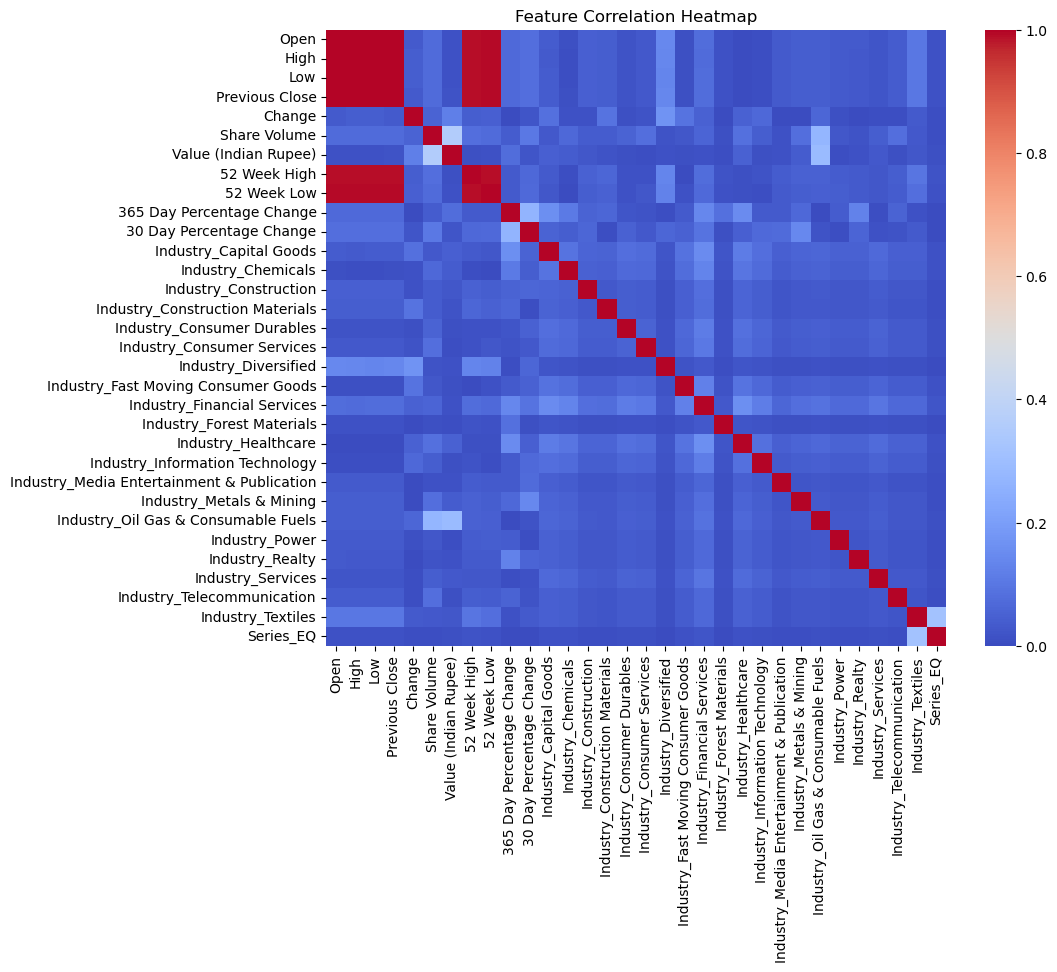

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr().abs()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

high_corr_features = set()
threshold = 0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

X = X.drop(columns=high_corr_features)
